# Lecture 4 – Pandas III

### DATA 2201, Fall 2025

A demonstration of advanced `pandas` syntax to accompany Lecture 4.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

### Loading `babynames` Dataset

In [ ]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "../data/babynamesbystate.zip"
if not os.path.exists(local_filename): # If the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.tail(10)

## Review: Useful Utility Functions

#### `NumPy`

The `NumPy` functions you encountered in [Data 8](https://www.data8.org/su23/reference/#array-functions-and-methods) are compatible with objects in `pandas`. 


<details>
<summary>Click to show solution</summary>

<pre>

yash_counts = babynames[babynames["Name"] == "Yash"]["Count"]

</pre>
</details>



In [ ]:
yash_counts = ...
yash_counts

In [ ]:
# Average number of babies named Yash each year



In [ ]:
# Max number of babies named Yash born in any single year



#### Built-In `pandas` Methods

There are many, *many* utility functions built into `pandas`, far more than we can possibly cover in lecture. You are encouraged to explore all the functionality outlined in the `pandas` [documentation](https://pandas.pydata.org/docs/reference/index.html).

In [ ]:
# Returns the shape of the object in the format (num_rows, num_columns)


In [ ]:
# Sort a Series


In [ ]:
# Sort a DataFrame – there are lots of Michaels in California



<details>
<summary>Click to show solution</summary>

<pre>

babynames.sort_values(by="Count", ascending=False)

</pre>
</details>



## Custom sorting
- Let’s try to solve the sorting problem with different approaches:

### Approach 1: Create a temporary column

In [ ]:
# Create a Series of the length of each name
babyname_lengths = ...

# Add a column named "name_lengths" that includes the length of each name
babynames["name_lengths"] = babyname_lengths
babynames.head(5)

In [ ]:
# Sort by the temporary column
babynames = babynames.sort_values(by="name_lengths", ascending=False)
babynames.head(5)

In [ ]:
# Drop the 'name_lengths' column
babynames = babynames.drop("name_lengths", axis="columns")
babynames.head(5)

### Approach 2: Sorting using the `key` argument

- Apply the `key` function to the values before sorting. 
- The `key` function should be vectorized. 
- It should expect a `Series` and return a `Series` with the same shape as the input. 
- It will be applied to each column in `by` independently.

In [ ]:
babynames.sort_values(...)


<details>
<summary>Click to show solution</summary>

<pre>

babynames.sort_values(by="Name", key=lambda x:x.str.len(), ascending=False).head()

</pre>
</details>



### Approach 3: Sorting Using the `map` Function

- We can also use the Python `map` function if we want to use an arbitrarily defined function. 
- Suppose we want to sort by the number of occurrences of "dr" plus the number of occurrences of "ea".

In [ ]:
# First, define a function to count the number of times "dr" or "ea" appear in each name
def dr_ea_count(string):
    return string.count('dr') + string.count('ea')

# Then, use `map` to apply `dr_ea_count` to each name in the "Name" column
babynames["dr_ea_count"] = babynames["Name"].map(dr_ea_count)

# Sort the DataFrame by the new "dr_ea_count" column so we can see our handiwork
babynames = babynames.sort_values(by="dr_ea_count", ascending=False)
babynames.head()

In [ ]:
# Drop the `dr_ea_count` column
babynames = babynames.drop("dr_ea_count", axis="columns")
babynames.head(5)

## Grouping

### 📌 Our Goal

- Group together rows that fall under the same category.  
      - For example, group together all rows from the same year.

- Then, perform an operation that **aggregates** across all rows in the category.  
      - For example, sum up the total number of babies born in that year.

---

### 🔍 Why Grouping?

Grouping is a powerful tool to:

1. Perform large operations, all at once  
2. Summarize trends in a dataset


## Visual Review of DATA 1201: Grouping and Collection
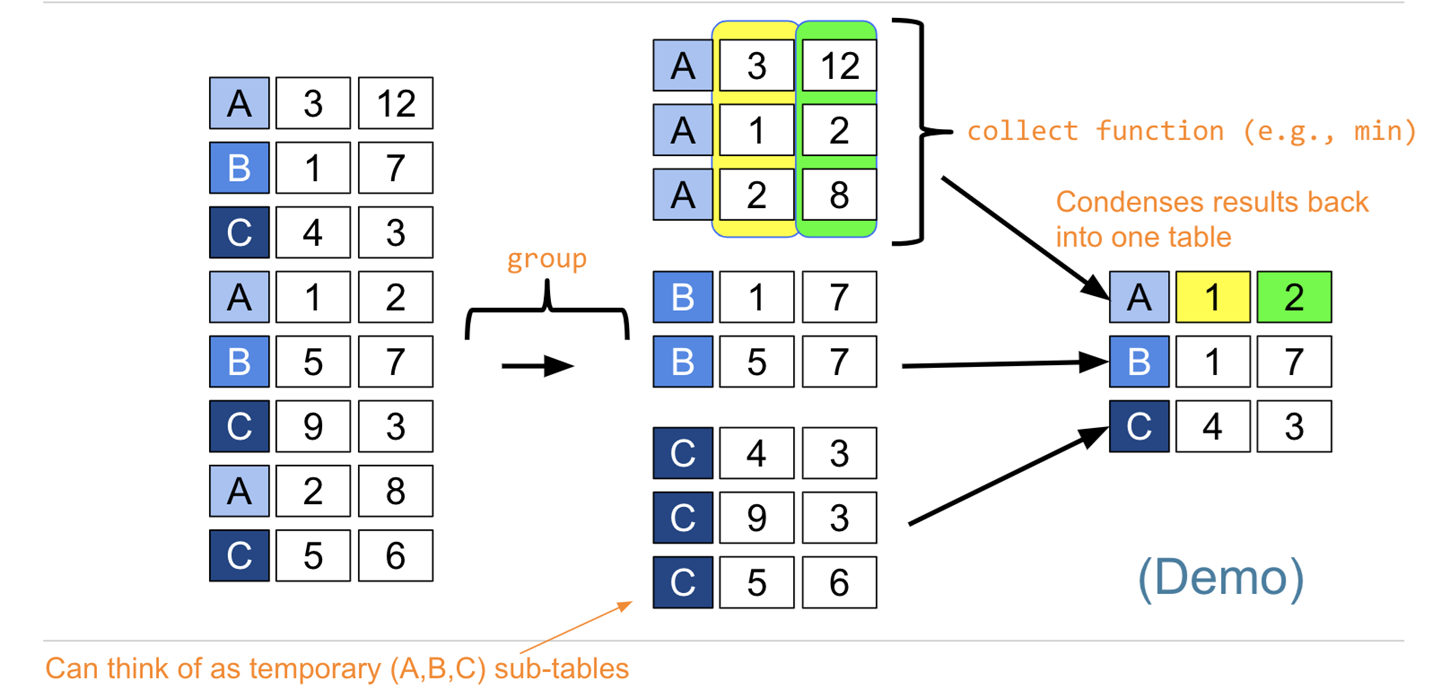

## Putting It All Together- Groupby and agg
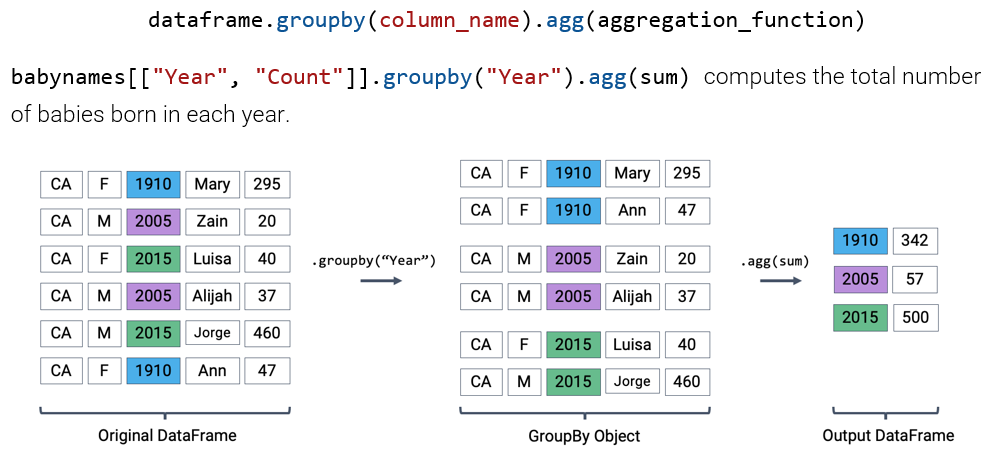

## Aggregation Functions
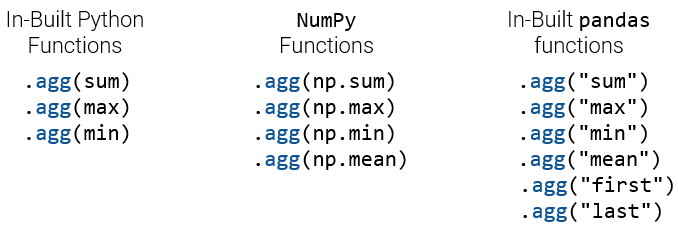

In this example, we count the total number of babies born each year (considering only a small subset of the data for simplicity).

In [ ]:
babynames.groupby("Year")

In [ ]:
# Selecting only numerical columns to perform grouping on and then grouping by "Year"
babies_by_year = ...
babies_by_year


<details>
<summary>Click to show solution</summary>

<pre>

babies_by_year = babynames[["Year", "Count"]].groupby("Year").agg(sum)

</pre>
</details>



In [ ]:
# Plotting baby counts per year
fig = px.line(babies_by_year, y = "Count")
fig.update_layout(font_size = 18, 
                  autosize=False, 
                  width=700, 
                  height=400)

### Exercise - Check your understanding

Try to predict the results of the `groupby` operation shown. 

<img src="images/groupby.png" width="600">

<br><details><summary>Click for Solution</summary> <br>
    
The top ?? will be "hi", the second ?? will be "tx", and the third ?? will be "sd". 

</details><br>

In [ ]:
ds = pd.DataFrame(dict(x=[3, 1, 4, 1, 5, 9, 2, 5, 6], 
                      y=['ak', 'tx', 'fl', 'hi', 'mi', 'ak', 'ca', 'sd', 'nc']), 
                      index=list('ABCABCACB') )
ds

In [ ]:
# Performing groupby on the first column with max aggregation function
ds.groupby(ds.index).agg(max)

### Case Study: Name "Popularity"

- In this exercise, let's find the name with sex "F" that has dropped most in popularity since its peak usage in California. 
- We'll start by filtering `babynames` to only include names corresponding to sex "F".

In [ ]:
f_babynames = ...
f_babynames

In [ ]:
# We sort the data by "Year"
f_babynames = ...
f_babynames

To build our intuition on how to answer our research question, let's visualize the prevalence of the name "Jennifer" over time.

In [ ]:
# We'll talk about how to generate plots in a later lecture
fig = px.line(f_babynames[f_babynames["Name"] == "Jennifer"],
              x="Year", y="Count")

fig.update_layout(font_size = 18, 
                  autosize=False, 
                  width=1000, 
                  height=400)

We'll need a mathematical definition for the change in popularity of a name in California.

- Define the metric "Ratio to Peak" (RTP). 
- We'll calculate this as the count of the name in 2022 (the most recent year for which we have data) divided by the largest count of this name in *any* year. 

A demo calculation for Jennifer:

In [ ]:
# In the year with the highest Jennifer count, 6065 Jennifers were born
max_jenn = ...
max_jenn


<details>
<summary>Click to show solution</summary>

<pre>

max_jenn = np.max(f_babynames[f_babynames["Name"] == "Jennifer"]["Count"])

</pre>
</details>



In [ ]:
# Remember that we sorted f_babynames by "Year". 
# This means that grabbing the final entry gives us the most recent count of Jennifers: 114
# In 2022, the most recent year for which we have data, 114 Jennifers were born
curr_jenn = ...
curr_jenn


<details>
<summary>Click to show solution</summary>

<pre>

curr_jenn = f_babynames[f_babynames["Name"] == "Jennifer"]["Count"].iloc[-1]

</pre>
</details>



In [ ]:
# Compute the RTP
curr_jenn / max_jenn

We can also write a function that produces the `ratio_to_peak`for a given `Series`. This will allow us to use `.groupby` to speed up our computation for all names in the dataset.

In [ ]:
def ratio_to_peak(series):
    """
    Compute the RTP for a Series containing the counts per year for a single name (year column sorted ascendingly).
    """
    return series.iloc[-1] / np.max(series)

In [ ]:
# Construct a Series containing our Jennifer count data
jenn_counts_ser = ...

# Then, find the RTP
ratio_to_peak(jenn_counts_ser)


<details>
<summary>Click to show solution</summary>

<pre>

jenn_counts_ser = f_babynames[f_babynames["Name"] == "Jennifer"]["Count"]

</pre>
</details>



Now, let's use `.groupby` to compute the RTPs for *all* names in the dataset.

- You may see a warning message when running the cell below. 
- As discussed in the lecture, `pandas` can't apply an aggregation function to non-numeric data (it doens't make sense to divide "CA" by a number). 
- We can select numerical columns of interest directly.

In [ ]:
rtp_table = ...
rtp_table


<details>
<summary>Click to show solution</summary>

<pre>

rtp_table = f_babynames.groupby("Name")[["Year", "Count"]].agg(ratio_to_peak)

</pre>
</details>



#### A Note on Nuisance Columns

Executing our agg call results in a TypeError.



In [ ]:
# Results in a TypeError
# rtp_table2 = f_babynames.groupby("Name").agg(ratio_to_peak)
# rtp_table2

Below, we explicitly select the column(s) we want to apply our aggregation function to BEFORE calling agg. 
- This avoids the warning or error (and can prevent unintentional loss of data).


In [ ]:
rtp_table2 = ...
rtp_table2


<details>
<summary>Click to show solution</summary>

<pre>

rtp_table2 = f_babynames.groupby("Name")[["Count"]].agg(ratio_to_peak)

</pre>
</details>



### Exercise - Check your understanding

In `rtp_table`, is there a row where `Year` is not equal to 1?

In [ ]:
# Try to answer the question


<details><summary>Click for Solution</summary> <br>

```python
# Unique values in the Year column
rtp_table["Year"].unique()
```
    
</details><br>

### Renaming Columns After Grouping

In [ ]:
# Dropping the "Year" column
rtp_table.drop(...)
rtp_table


<details>
<summary>Click to show solution</summary>

<pre>

rtp_table.drop("Year", axis="columns", inplace=True)

</pre>
</details>



In [ ]:
# Rename "Count" to "Count RTP" for clarity
rtp_table = rtp_table.rename(...)
rtp_table


<details>
<summary>Click to show solution</summary>

<pre>

rtp_table = rtp_table.rename(columns = {"Count": "Count RTP"})

</pre>
</details>



In [ ]:
# What name has fallen the most in popularity?
rtp_table.sort_values(...)

We can visualize the decrease in the popularity of the name "Debra:"

In [ ]:
def plot_name(*names):
    fig = px.line(f_babynames[f_babynames["Name"].isin(names)], 
                  x = "Year", y = "Count", color="Name",
                  title=f"Popularity for: {names}")
    fig.update_layout(font_size = 18, 
                  autosize=False, 
                  width=1000, 
                  height=400)
    return fig

plot_name("Debra")

In [ ]:
# Find the 10 names that have decreased the most in popularity
top10 = rtp_table.sort_values("Count RTP").head(10).index
top10

In [ ]:
plot_name(*top10)

For fun, try plotting your name or your friends' names.

### `groupby.size` and `groupby.count()`

In [ ]:
df = pd.DataFrame({'letter':['A', 'A', 'B', 'C', 'C', 'C'], 
                   'num':[1, 2, 3, 4, np.NaN, 4], 
                   'state':[np.NaN, 'tx', 'fl', 'hi', np.NaN, 'ak']})
df

## `groupby.size()`
- `groupby.size()` returns a `Series`, indexed by the `letter`s that we grouped by, with values denoting the number of rows in each group/sub-DataFrame.
- It does not care about missing (`NaN`) values.

## `groupby.count()`
- `groupby.count()` returns a `DataFrame`, indexed by the `letter`s that we grouped by.
- Each column represents the number of non-missing values for that `letter`.

You might recall `value_counts()` function we talked about last week. What's the difference?

Turns out `value_counts()` does something similar to `groupby.size()`, except that it also sorts the resulting `Series` in descending order.